# CARTaGENE HLA figures

2025 / Peyton McClelland / mcclellandpeyton@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [3]:
HLA_dir_path = "/path_to/HLA_data"
HLA_call_path = f"{HLA_dir_path}/HLA_allele_calls.csv"

CAG_HLA = pd.read_csv(HLA_call_path)

In [ ]:
output_path = "./HLA_figures"

## S11.A Number of alleles typed per locus

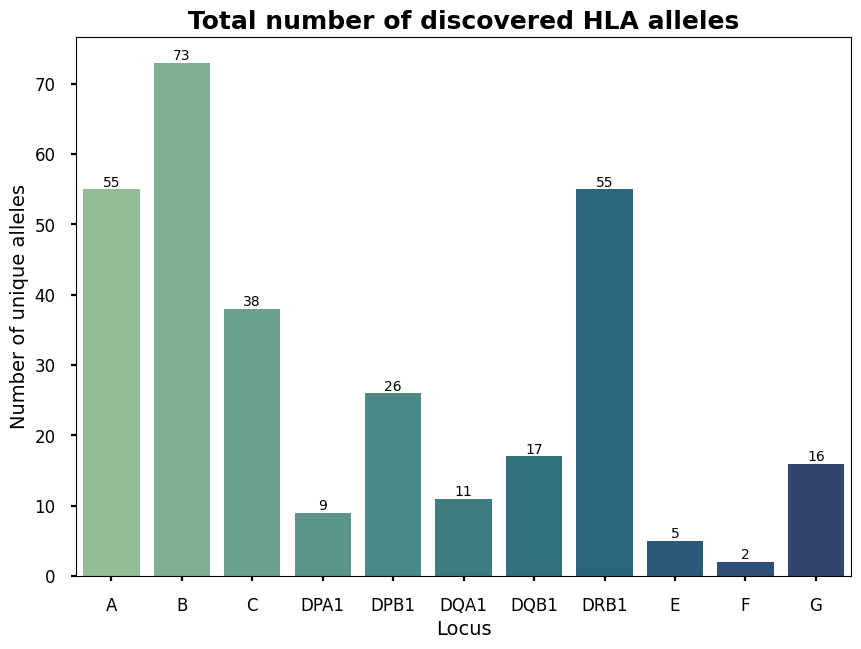

In [4]:
alleles_per_locus = CAG_HLA.groupby("Locus")['Allele'].describe().reset_index()

with plt.style.context('seaborn-v0_8-poster'):
    fig, ax = plt.subplots(figsize=(10,7))
    fs, sfs, lfs = 14, 12, 18
    ax.set_title('Total number of discovered HLA alleles', fontsize=lfs, fontweight='bold')
    ax = sns.barplot(data = alleles_per_locus, x = 'Locus', y = 'unique', hue='Locus', palette="crest")
    [ax.bar_label(ax.containers[i]) for i in range(11)]
    plt.ylabel('Number of unique alleles', fontsize = fs)
    plt.xlabel('Locus', fontsize = fs)
    ax.tick_params(axis='both', which='major', labelsize=sfs)
    
    # fig.savefig('CAG_discovered_alleles.png', dpi=600, bbox_inches='tight')
    plt.show()

## S11.B HLA allele frequencies in CARTaGENE vs. in Hema-Quebec (regional)

In [7]:
CAG_Region_file = f"{HLA_dir_path}/CAG_Regions.csv"
CAG_Regions = pd.read_csv(CAG_Region_file).set_index("Region")

HQ_AF_path = f"{HLA_dir_path}/allele_frequencies/CAG_HLA.compare-AF.HQ.csv"
HQ_CompareAF_df = pd.read_csv(HQ_AF_path)

HQ_CompareAF = {}
for Region, DF in HQ_CompareAF_df.groupby("Region"):
    HQ_CompareAF[Region] = DF
    
HQ_Regional_file = 'path_to/HQ_Regional_Codes.txt'
HQ_RegionalCodes = pd.read_csv(HQ_Regional_file, sep='\t', header=0, 
                               names=['List', 'Region', 'Code', 'HLA-A', 'HLA-B', 'HLA-DRB1'],
                               encoding='unicode_escape')

RegionCodes_Map = {
    'Quebec':3, # Capitale-Nationale
    'Montreal':6, # Montreal
    'Sherbrooke':5, # Estrie
    'Gatineau':7, # Outaouais
    'Saguenay':2, # Saguenay-Lac- Saint-Jean
}
CAG_Regions = CAG_Regions.drop("Gatineau") # Sample size too small
Region_List = list(CAG_Regions.index)*2

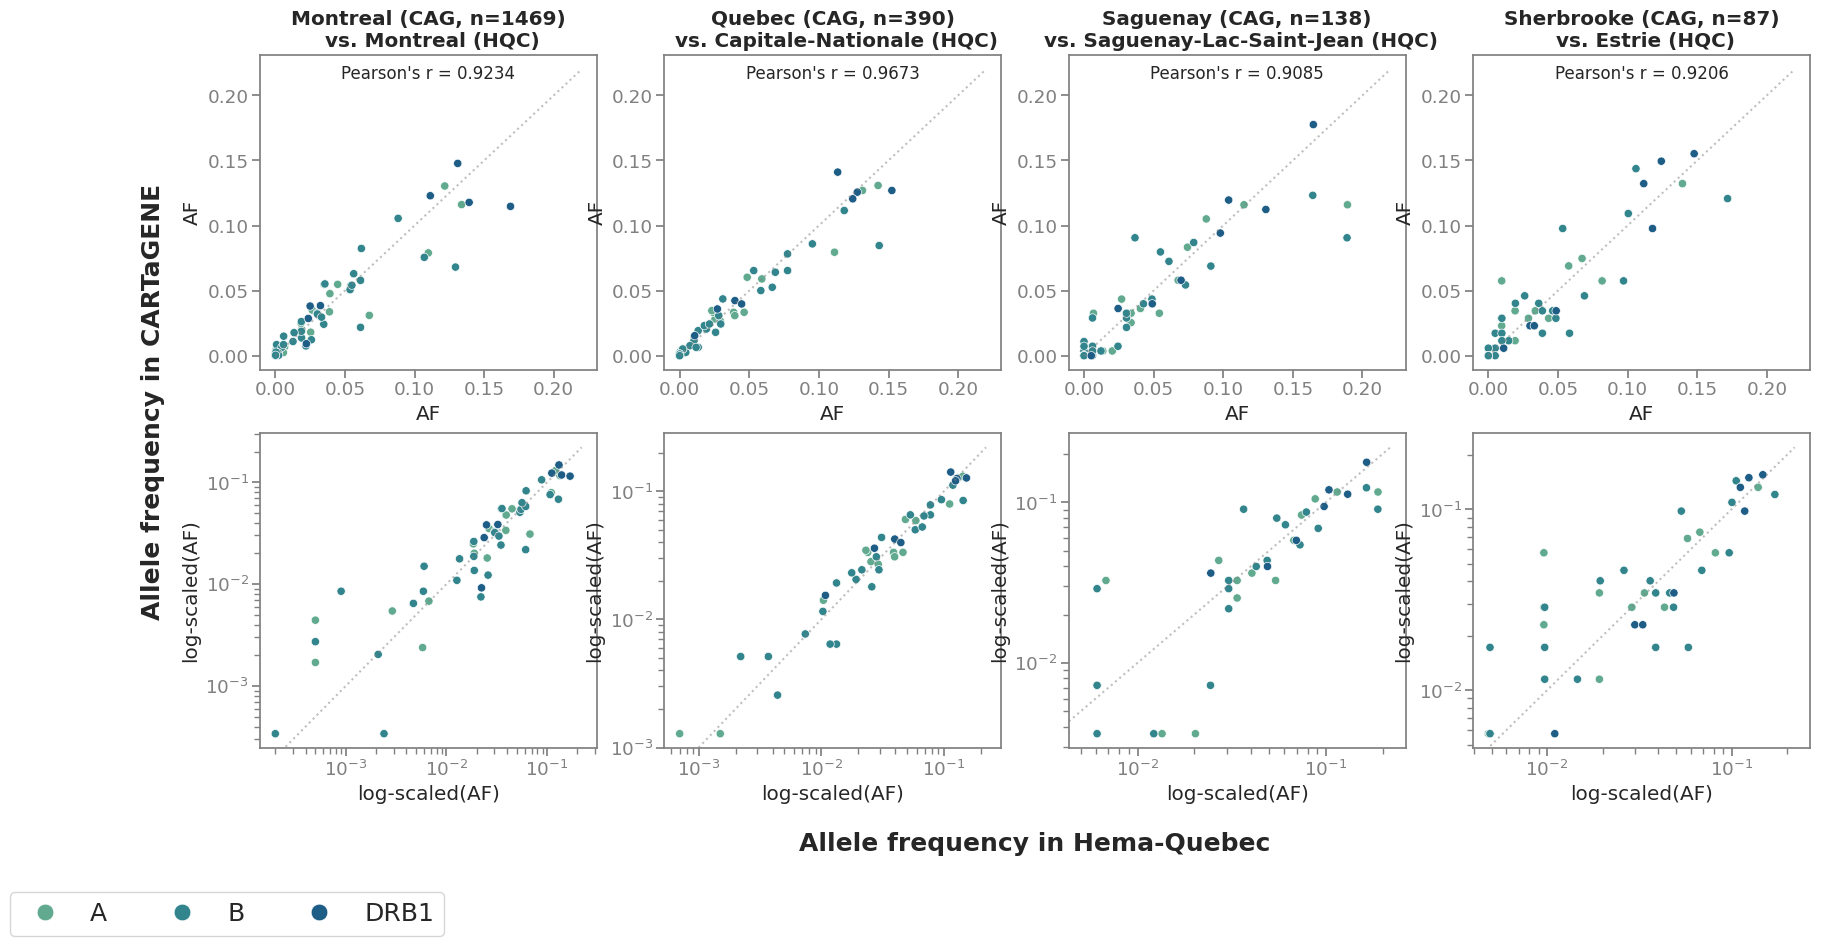

In [8]:
with plt.style.context('seaborn-v0_8-poster'):
    sns.set(font_scale=1.2)
    sns.set_style("ticks", {'axes.edgecolor': 'gray', 'xtick.color': 'gray', 'ytick.color': 'gray'})
    fig, ax = plt.subplots(2,4, figsize=(20,9))
    
    for i, ax in enumerate(fig.axes):
            Region = str(Region_List[i])
            sns.scatterplot(data= HQ_CompareAF[Region], y='Freq_CAG', x='Freq_HQC', 
                            ax=ax, hue='Locus', palette="crest"
                           )
            
            sfs, fs= 12,18

            xx = np.linspace(0,0.22,2)
            ax.plot(xx, xx, ":", color='grey',  alpha=0.5)
            
            HQ_Region = HQ_RegionalCodes.loc[HQ_RegionalCodes['Code'] == str(RegionCodes_Map[Region])]['Region'].item()
            nCAG = CAG_Regions['N_Samples'][Region]
            
            import matplotlib.ticker as ticker
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
            ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
            
            if i < 4:
                r2 =  HQ_CompareAF[Region].corr(numeric_only=True)['Freq_CAG']['Freq_HQC']
                s1 = (f"Pearson's r = {r2:.4f}")
                ax.text(0.5, 0.97, s1, ha='center', va='top', fontsize=sfs, transform=ax.transAxes)
                ax.set_title(Region+' (CAG, n='+str(nCAG)+')\n vs. '+HQ_Region+' (HQC)', fontweight='bold')
                ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
                ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
                
                ax.set(xlabel='AF', ylabel='AF')

            else:
                ax.set_xscale('log')
                ax.set_yscale('log')
                # if i == 4:
                ax.set(xlabel='log-scaled(AF)', ylabel='log-scaled(AF)')
                
            ax.tick_params(axis='both', pad=2)
            handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            # ax.grid(None)
        
    # fig.grid(None)
    # fig.legend(handles, labels, loc='lower center', ncols=3)
    fig.legend(handles, labels, ncols=3, bbox_to_anchor=(0, -0.05), loc='upper left', borderaxespad=0, fontsize=fs, markerscale=2)
    
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.ylabel("Allele frequency in CARTaGENE", fontweight='bold', fontsize=fs, labelpad=30)
    plt.xlabel("Allele frequency in Hema-Quebec", fontweight='bold', fontsize=fs, labelpad=30)
    
    plt.show()
    # plt.savefig(f'{output_path}/AF_plots/HQC_Regional_AF_multi_log.png', dpi=800, bbox_inches='tight')

## S11.C HLA allele frequencies in CARTaGENE vs. in Global Reference Panel

In [10]:
Reference_AF_path = f"{HLA_dir_path}/allele_frequencies/CAG_HLA.compare-AF.Luo.csv"

compareAF = pd.read_csv(Reference_AF_path)
custompalette=["orange"]+[sns.color_palette("crest")[0]]+[sns.color_palette("crest_r")[3]]

In [11]:
# single plot with annotated HLA allele

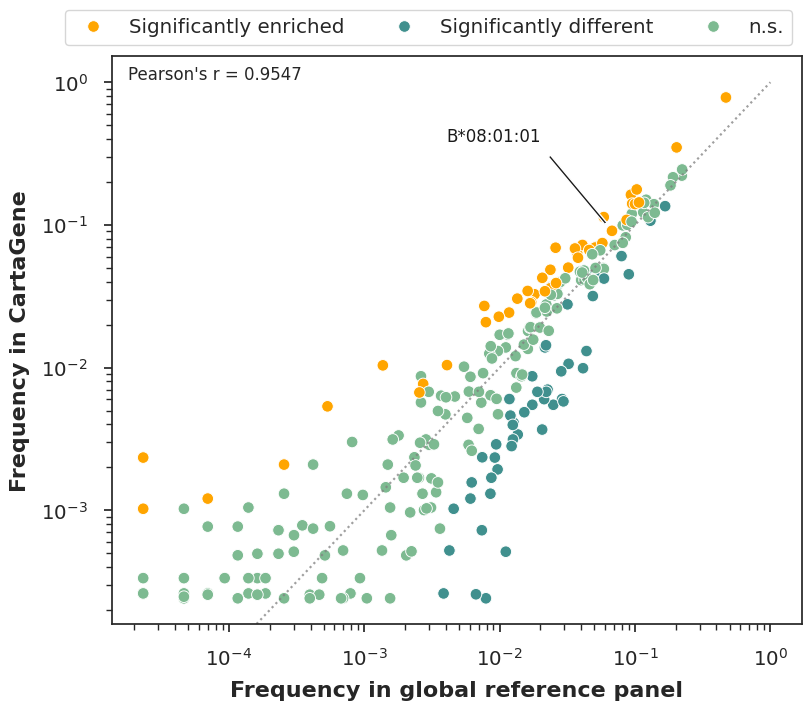

In [12]:
with plt.style.context('seaborn-v0_8-poster'):
    sns.set(font_scale=1.3)
    sns.set_style('ticks')
    fig, ax = plt.subplots(1,1, figsize=(8,7), sharey=True, constrained_layout = True)
    
    xx = np.linspace(0,1,2)
    ax.plot(xx, xx, ":", color='grey',  alpha=0.5)
    ax.plot(xx, xx, ":", color='grey', alpha=0.5)

    p = sns.scatterplot(data=compareAF, x = 'Freq_TAPAS', y = 'CAG_Freq', ax=ax, s=70,
                    palette=custompalette, hue='Signif_Diff')
    
    r2 = compareAF.corr(numeric_only=True)['CAG_Freq']['Freq_TAPAS']
    s1 = (f"Pearson's r = {r2:.4f}")
    
    sfs, fs, lfs = 12, 14, 16
    ax.legend(fontsize=sfs, title  = "")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=[handles[0],handles[2], handles[1]], labels=[labels[0],labels[2],labels[1]],
              bbox_to_anchor=[1,1.1], ncol=3,
             )
    ax.text(0.15, 0.96, s1, ha='center', fontsize=sfs, transform=ax.transAxes)
    
    ax.set_ylabel('Frequency in CartaGene', labelpad=8, fontweight='bold', fontsize=lfs)
    ax.set_xlabel('Frequency in global reference panel', labelpad=8, fontweight='bold', fontsize=lfs)
    ax.grid(False)
    
    ## uncomment to cut axes
    # ax.set(xlim=(-0.02,0.4), ylim=(-0.02,0.4))
    ## uncomment to log-scale axes
    plt.xscale('log')
    plt.yscale('log')
    
    def plotlabel(xvar, yvar, label):
            # ax.text(xvar, yvar, label, fontsize=7, color='k')#, rotation=25)
            arrowspecs = dict(shrink=0.08, width=2, headlength=0.4,headwidth=0.4, facecolor='k')
            plt.annotate(label, xy=(xvar, yvar), xytext=(xvar-10, yvar+5), textcoords='offset fontsize', fontsize=sfs, color='k', arrowprops=arrowspecs, ha='left', va='bottom')
           
    ## uncomment to annotate allele of interest
    compareAF.query('Allele == "B*08:01:01"').apply(lambda x: plotlabel(x['Freq_TAPAS'], x['CAG_Freq'], x['Allele'].replace("HLA_", "")),axis=1)
   
    ## uncomment to save figure
    # plt.savefig(f'{output_path}/AF_compare_TAPAS.annotatedB08.png',dpi=1000, bbox_inches='tight')
    plt.show()

In [13]:
# multi-view plot with log-scaled axes and zoomed-in view

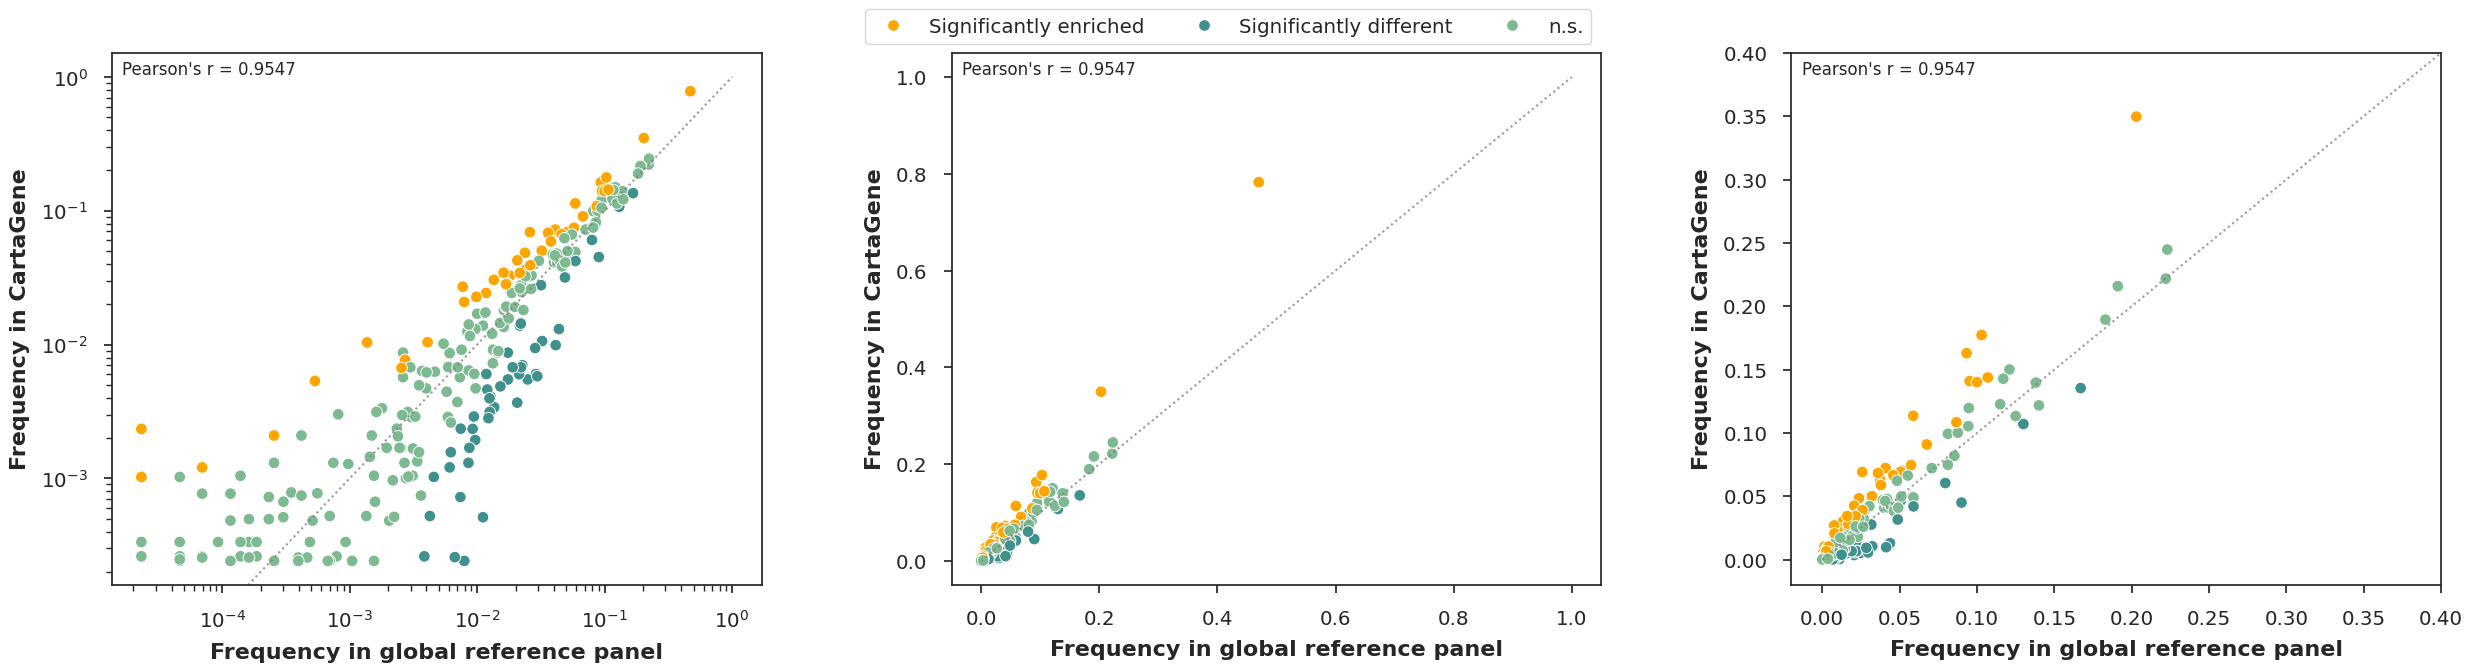

In [14]:
with plt.style.context('seaborn-v0_8-poster'):
    sns.set(font_scale=1.3)
    sns.set_style('ticks')
    fig, axes = plt.subplots(1,3, figsize=(25,7), tight_layout = True)
    
    xx = np.linspace(0,1,2)
    r2 = compareAF.corr(numeric_only=True)['CAG_Freq']['Freq_TAPAS']
    s1 = (f"Pearson's r = {r2:.4f}")
    
    sfs, fs, lfs = 12, 14, 16
    
    for i, ax in enumerate(axes):
        ax.plot(xx, xx, ":", color='grey',  alpha=0.5)
        ax.plot(xx, xx, ":", color='grey', alpha=0.5)

        p = sns.scatterplot(data=compareAF, x = 'Freq_TAPAS', y = 'CAG_Freq', ax=ax, s=70,
                        palette=custompalette, hue='Signif_Diff')

        ax.legend(fontsize=sfs, title  = "")
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=[handles[0],handles[2], handles[1]], labels=[labels[0],labels[2],labels[1]],
                  bbox_to_anchor=[1,1.1], ncol=3,
                 )
        ax.text(0.15, 0.96, s1, ha='center', fontsize=sfs, transform=ax.transAxes)

        ax.set_ylabel('Frequency in CartaGene', labelpad=8, fontweight='bold', fontsize=lfs)
        ax.set_xlabel('Frequency in global reference panel', labelpad=8, fontweight='bold', fontsize=lfs)
        ax.grid(False)
    
    axes[0].get_legend().remove()
    axes[2].get_legend().remove()

    ## log-scale axes
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')

    ## zoom axes
    axes[2].set(xlim=(-0.02,0.4), ylim=(-0.02,0.4))
        
    ## uncomment to save figure
    # plt.savefig(f'output_path/AF_compare_TAPAS.multiview.png',dpi=1000, bbox_inches='tight')
    plt.show()

## S17.A. Plot top hits from HLA PheWAS

In [58]:
HLA_PheWAS_path = "path_to/HLA_Regenie_output/"
results_all = f"{HLA_PheWAS_path}results.all_samples.2f.regenie.tsv"
results_eur = f"{HLA_PheWAS_path}results.EUR_subset.2f.regenie.tsv"
results_combined = f"{HLA_PheWAS_path}all_hits.ALL-EUR.2f.regenie.tsv"

phewas_all = pd.read_csv(results_all, sep='\t')
phewas = pd.read_csv(results_combined, sep='\t')

In [59]:
phewas_all.query("PVAL < PVAL_Thr").PHENOTYPE.value_counts()

PHENOTYPE
TSH                       6
WBC                       6
MONO_N                    5
LYMPHO_N                  5
EOSINO_N                  3
PLATELET                  3
AST                       3
CALC_AVG_HEIGHT_CM        2
RES_MEASURED_FEV1         2
RES_MEASURED_FVC          2
CALC_AVG_DIASTOLIC_BP     1
ALT                       1
MENSTRUATION_ONSET_AGE    1
MCV                       1
MCH                       1
CHLORIDE                  1
CREATININE                1
NEUTRO_N                  1
RBC                       1
T4                        1
Name: count, dtype: int64

In [60]:
def plot_hits(input_df, phenotype):
    # hla_region = ['A', 'C', 'B', 'DRA1', 'DRB1', 'DQA1', 'DPA1', 'DPB1']
    hla_region = ['A', 'C', 'B', 'DR', 'DQ', 'DP']

    ### prepare plot data
    data = input_df.copy().query(f'PHENOTYPE == "{phenotype}" ')
    data['Locus'] = data['ID'].str.split('*',expand=True)[0].str.split('_',expand=True)[1]
    data['Locus_major'] = pd.Categorical( np.where(data['Locus'].str.startswith('D'), data['Locus'].str[:2], data['Locus']),
                                       categories=hla_region, ordered=True )

    data.sort_values('Locus_major',inplace=True)
    data = data.sort_values(by=['Locus_major','ID']).reset_index(drop=True).reset_index()
    # data.sort_values('GENPOS',inplace=True)

    ### plot
    fig, ax = plt.subplots(1)
    pp = sns.scatterplot(data, x='index', y='LOG10P', hue='Locus_major', legend=False, palette="hls")

    lfs=12
    fs=10
    sfs=8

    ## set x labels to locus names
    xlabels = dict( data.groupby('Locus_major', observed=True)['index'].median() )

    ax.set_xticks(list(xlabels.values()))
    ax.set_xticklabels(xlabels.keys())
    ax.set(xlabel='Locus', ylabel='-$\\log_{10}$(p-value)', title=f'{phenotype}')
    # ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
    # ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
    
    ## indicate threshold
    thr = float(f'{data.LOG10_Thr.unique()[0]}')
    thr_col = 'grey'
    ax.axhline(thr, ls=':', color=thr_col)

    ## label text at threshold line
    x0,x1 = plt.gca().get_xlim()
    # thr_label=" p < {:.4f}".format(10**-thr)
    thr_label=" p < {:.2e}".format(10**-thr) ## sci not
    ax.annotate(thr_label, xy=(x1,thr), xycoords='data', xytext=(-5,-5), textcoords='offset pixels', ha='right', va='top', fontsize=sfs, color=thr_col)


    ## label signif hits
    def plotlabel(xvar, yvar, label):
            ax.text(xvar+3, yvar, label, fontsize=sfs, color='k')#, rotation=25)

    data.query('LOG10P > LOG10_Thr').apply(lambda x: plotlabel(float(x['index']), x['LOG10P'], x['ID'].replace("HLA_", "")),axis=1)
    
    ## text to say # of hits
    y0,y1 = plt.gca().get_ylim()
    # ax.text(x=x0*1.06, y=y1*1.01, s=f'{summary[g][phenotype]} significant hit(s)', fontsize=sfs, ha='left', va='bottom', fontstyle='italic')
    
    # plt.show()
    return fig

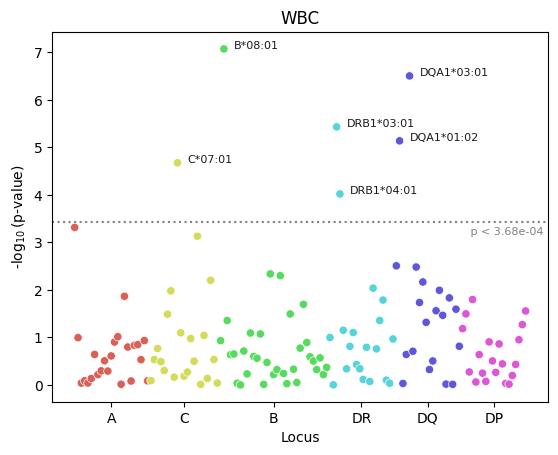

In [61]:
plot_hits(phewas_all, "WBC")

## S17.B Miami PheWAS plot (All samples vs. EUR)

In [69]:
# df['col_3'] = 
def ef(x):
    return x/(abs(x))
phewas[['Effect_ALL','Effect_EUR']] = phewas[['BETA_ALL','BETA_EUR']
                                        ].apply(lambda x: ef(x), axis=1)

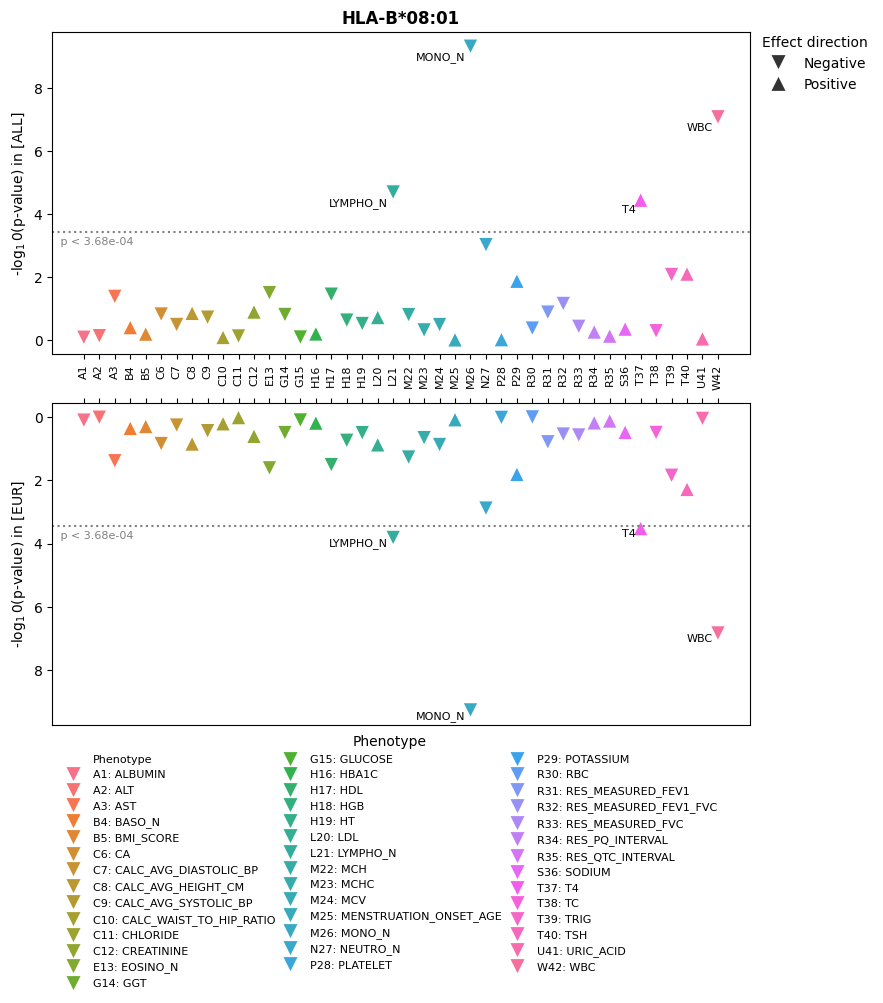

In [75]:
def miami_plot(allele):
    data = phewas.query(f'ID == "{allele_of_interest}"').reset_index(drop=True).copy()
    data['PHE_codes'] = pd.Categorical(data.PHENOTYPE).codes + 1
    data['PHE_LABELS'] = data['PHENOTYPE'].str[0] + data['PHE_codes'].astype('str')
    data['Phenotype'] = data['PHE_LABELS'] + ': ' + data['PHENOTYPE']
    
    ## function to label signif hits
    def phenolabel(x, xvar, ax, adj):#(xvar, yvar, label):
            xvar, yvar = x['index'], xvar
            label = x['PHENOTYPE']
            # ax.text(xvar+0.25, yvar+0.1, label, fontsize=sfs, color='k')#, rotation=25)
            ax.annotate(label, xy=(xvar,yvar), xycoords='data', xytext=adj, 
                        textcoords='offset pixels', ha='right', va='top', fontsize=sfs)#, color=thr_col)
    
    ### parameters
    ms=60
    rot= 90
    lfs, fs, sfs =12, 10, 8
    
    ### PLOT
    fig, ax = plt.subplots(2, figsize=(9,9))
    for i in range(2):
        
        suff = ['ALL', 'EUR']
        ydata = ['LOG10P_ALL', 'LOG10P_EUR']
        effectdata = ['Effect_ALL', 'Effect_EUR']
        
        pp = sns.scatterplot(data, x='PHE_LABELS', y=ydata[i], 
                             style=effectdata[i], markers=['v','^'], s=ms*2,
                             hue='Phenotype',
                             # legend=False, 
                             ax=ax[i])
    
        ax[i].set(xlabel='', ylabel=f'-$\\log_{10}$(p-value) in [{suff[i]}]')
        ax[i].set_title(f'{allele.replace("_","-")}', fontweight='bold')
        
        ## indicate threshold
        thr = float(f'{data.LOG10_Thr_ALL.unique()[0]}')
        thr_col = 'grey'
        ax[i].axhline(thr, ls=':', color=thr_col)

        handles, labels = ax[i].get_legend_handles_labels()
        ax[i].get_legend().remove()
        
    for i in range(2):
        x0,x1 = plt.gca().get_xlim()
        thr_label=" p < {:.2e}".format(10**-thr) ## sci not
        labelpos = [[5,-5], [5,-5]]
        ax[i].annotate(thr_label, xy=(x0,thr), xycoords='data', textcoords='offset pixels', 
                       xytext=labelpos[i], ha='left', va='top', fontsize=sfs, color=thr_col)
        labelpos2 = [[-5,-5], [-5,0]]
        signi = data.reset_index().query(f'LOG10P_{suff[i]} > LOG10_Thr_{suff[i]}')
        signi.apply(lambda x: phenolabel(x, x[f'LOG10P_{suff[i]}'], ax[i], labelpos2[i]),axis=1)

        
    ax[1].invert_yaxis()
    ax[1].xaxis.set_ticks_position('top')
    ax[1].set_xticklabels([])
    ax[1].set(title='')
    
    ax[0].xaxis.set_tick_params(labelsize = sfs, rotation=90)

    import matplotlib.patches as mpatches
    blank_handle = mpatches.Patch(color='white', alpha=0, label=labels[0])
    fig.legend(handles[:-3], labels[:-3], frameon=False,title='Phenotype',
               loc='upper center', bbox_to_anchor = (0.5,0.11), ncol=3, columnspacing=0.35, fontsize=sfs)               
    fig.legend(handles[-2:], ['Negative', 'Positive'], frameon=False, title='Effect direction',
               loc='upper left', bbox_to_anchor = (0.9,0.89), ncol=1)
              
    plt.subplots_adjust(hspace=0.15)
    plt.show()
    
    allele_title = allele.replace('*','_').replace(':','')
    # plt.savefig(f"{output_dir}/PHEWAS_Miami.{allele_title}.png", dpi=500, bbox_inches='tight')

allele_of_interest = "HLA_B*08:01"
miami_plot(allele_of_interest)
